In [1]:
! pip install evaluate
! pip install bert_score
! pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [2]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from evaluate import load
import evaluate
import matplotlib.pyplot as plt

2024-05-12 22:13:24.647568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 22:13:24.647731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 22:13:24.811619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...


Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.noun  
  inflating: /kaggle/working/corpora/wordnet/data.adv  


# Visualizations

# Evaluation Metrics

In [4]:
meteorscore = evaluate.load("meteor")
bertscore = load("bertscore")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [5]:
def calculate_accuracy(actual_answers,llm_responses):
    print("Accuracy Score : ",accuracy_score(actual_answers,llm_responses))

In [6]:
def calculate_bert(actual_answers,llm_responses):
    bert_score = bertscore.compute(predictions=llm_responses,references=actual_answers,lang="en")
    print("Bert-Score : ")
    print("F1 = ",np.average(bert_score["f1"]))
    print("Precision = ",np.average(bert_score["precision"]))
    print("Recall = ",np.average(bert_score["recall"]))
    return bert_score

In [7]:
def calculate_meteor(actual_answers,llm_responses):
    meteor_score = meteorscore.compute(predictions=llm_responses,references=actual_answers)
    print("Meteor Score : ",meteor_score)
    return meteor_score

 # Gemini Metrics

In [8]:
csv_gemini_path="/kaggle/input/gemini-responses/answers_gemini.csv"

In [9]:
answers_gemini = pd.read_csv(csv_gemini_path)


actual_answers = list(answers_gemini["actual_answers"])
gemini_responses = list(answers_gemini["llm_response"])

actual_answers_final = [str(i).strip().lower() for i in actual_answers]
gemini_responses_final = [str(i).strip().lower() for i in gemini_responses]


In [10]:
calculate_accuracy(actual_answers_final,gemini_responses_final)
individual_berts_gemini = calculate_bert(actual_answers_final,gemini_responses_final)
calculate_meteor(actual_answers_final,gemini_responses_final)

Accuracy Score :  0.533


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Bert-Score : 
F1 =  0.9443924124836922
Precision =  0.9449668346643448
Recall =  0.9447287050783634
Meteor Score :  {'meteor': 0.4339549789395325}


{'meteor': 0.4339549789395325}

# Llama 3 Metrics

In [11]:
csv_llama_path="/kaggle/input/gemini-responses/llama3.csv"

In [12]:
answers_llama = pd.read_csv(csv_llama_path)
answers_llama = answers_llama.head(2000)

actual_answers = list(answers_llama["actual_answers"])
llama_responses = list(answers_llama["llm_response"])

actual_answers_final = [str(i).strip().lower() for i in actual_answers]
llama_responses_final = [str(i).strip().lower() for i in llama_responses]


In [13]:
calculate_accuracy(actual_answers_final,llama_responses_final)
individual_berts_llama=calculate_bert(actual_answers_final,llama_responses_final)
calculate_meteor(actual_answers_final,llama_responses_final)

Accuracy Score :  0.3995
Bert-Score : 
F1 =  0.9251549375653267
Precision =  0.9292462224662303
Recall =  0.9223850412666798
Meteor Score :  {'meteor': 0.314090708187481}


{'meteor': 0.314090708187481}

In [14]:
print(len(individual_berts_llama['recall']))
print(len(individual_berts_gemini['recall']))


2000
2000


# Storing the BERT Score on individual tokens in a seperate CSV file.

In [15]:
data={
    'category':answers_gemini['category'],
    'complexityType':answers_gemini['complexityType'],
    'f1_llama':individual_berts_llama['f1'],
    'precision_llama':individual_berts_llama['precision'],
    'recall_llama':individual_berts_llama['recall'],
    'f1_gemini':individual_berts_gemini['f1'],
    'precision_gemini':individual_berts_gemini['precision'],
    'recall_gemini':individual_berts_gemini['recall']
}
df = pd.DataFrame(data)

In [16]:
category_wise_f1_gemini = df.groupby('category')['f1_gemini'].mean().to_dict()
category_wise_precision_gemini=df.groupby('category')['precision_gemini'].mean().to_dict()
category_wise_recall_gemini = df.groupby('category')['recall_gemini'].mean().to_dict()

complexity_wise_f1_gemini = df.groupby('complexityType')['f1_gemini'].mean().to_dict()
complexity_wise_precision_gemini = df.groupby('complexityType')['precision_gemini'].mean().to_dict()
complexity_wise_recall_gemini = df.groupby('complexityType')['recall_gemini'].mean().to_dict()
category_wise_f1_gemini

{'books': 0.9367294349704349,
 'geography': 0.9383753599943938,
 'history': 1.0000000794728596,
 'movies': 0.944017782039249,
 'music': 0.9410152694453364,
 'politics': 0.9457114081676692,
 'sports': 0.95920009702347,
 'videogames': 0.9433962728296007}

In [17]:
category_wise_f1_llama = df.groupby('category')['f1_llama'].mean().to_dict()
category_wise_precision_llama=df.groupby('category')['precision_llama'].mean().to_dict()
category_wise_recall_llama = df.groupby('category')['recall_llama'].mean().to_dict()

complexity_wise_f1_llama = df.groupby('complexityType')['f1_llama'].mean().to_dict()
complexity_wise_precision_llama = df.groupby('complexityType')['precision_llama'].mean().to_dict()
complexity_wise_recall_llama = df.groupby('complexityType')['recall_llama'].mean().to_dict()


In [18]:
import matplotlib.pyplot as plt

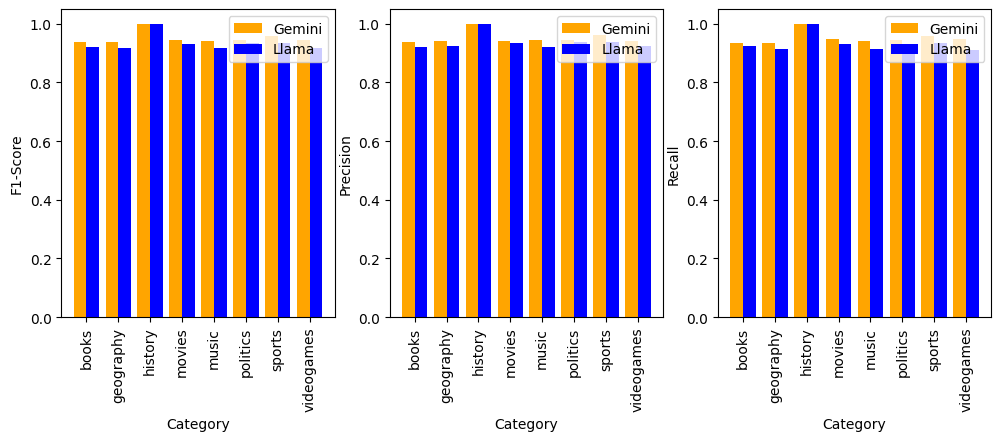

In [19]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
X_axis = np.arange(len(category_wise_f1_llama.keys()))
axes[0].bar(X_axis-0.2,category_wise_f1_gemini.values(),0.4,color='orange',label='Gemini')
axes[0].bar(X_axis+0.2,category_wise_f1_llama.values(),0.4,color='blue',label='Llama')
# axes[0][0].rotate(90)
axes[0].set_xticks(X_axis)
axes[0].set_xticklabels(category_wise_f1_llama.keys(),rotation=90)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("F1-Score")
axes[0].legend()

axes[1].bar(X_axis-0.2,category_wise_precision_gemini.values(),0.4,color='orange',label='Gemini')
axes[1].bar(X_axis+0.2,category_wise_precision_llama.values(),0.4,color='blue',label='Llama')
axes[1].set_xticks(X_axis)
axes[1].set_xticklabels(category_wise_precision_llama.keys(),rotation=90)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Precision")
axes[1].legend()

axes[2].bar(X_axis-0.2,category_wise_recall_gemini.values(),0.4,color='orange',label='Gemini')
axes[2].bar(X_axis+0.2,category_wise_recall_llama.values(),0.4,color='blue',label='Llama')
axes[2].set_xticks(X_axis)
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Recall")
axes[2].set_xticklabels(category_wise_recall_llama.keys(),rotation=90)
axes[2].legend()

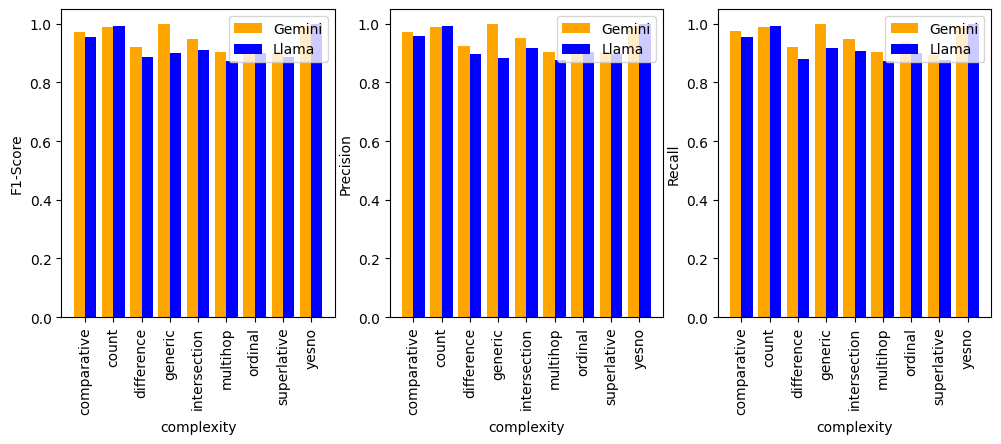

In [20]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
X_axis = np.arange(len(complexity_wise_f1_llama.keys()))
axes[0].bar(X_axis-0.2,complexity_wise_f1_gemini.values(),0.4,color='orange',label='Gemini')
axes[0].bar(X_axis+0.2,complexity_wise_f1_llama.values(),0.4,color='blue',label='Llama')
# axes[0][0].rotate(90)
axes[0].set_xticks(X_axis)
axes[0].set_xticklabels(complexity_wise_f1_llama.keys(),rotation=90)
axes[0].set_xlabel("complexity")
axes[0].set_ylabel("F1-Score")
axes[0].legend()

axes[1].bar(X_axis-0.2,complexity_wise_precision_gemini.values(),0.4,color='orange',label='Gemini')
axes[1].bar(X_axis+0.2,complexity_wise_precision_llama.values(),0.4,color='blue',label='Llama')
axes[1].set_xticks(X_axis)
axes[1].set_xticklabels(complexity_wise_precision_llama.keys(),rotation=90)
axes[1].set_xlabel("complexity")
axes[1].set_ylabel("Precision")
axes[1].legend()

axes[2].bar(X_axis-0.2,complexity_wise_recall_gemini.values(),0.4,color='orange',label='Gemini')
axes[2].bar(X_axis+0.2,complexity_wise_recall_llama.values(),0.4,color='blue',label='Llama')
axes[2].set_xticks(X_axis)
axes[2].set_xlabel("complexity")
axes[2].set_ylabel("Recall")
axes[2].set_xticklabels(complexity_wise_recall_llama.keys(),rotation=90)
axes[2].legend()